In [7]:
import numpy as np
import pandas as pd
from math import log2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [8]:
#loading data
lab7DT = pd.read_excel("D:\\COLLEGE\\3rd Year\\Machine Learning\\LAB\\DEC_TREE.xlsx")
lab7DT

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [9]:
# top 5 attributes of the features.
lab7DT.head()



,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [10]:
# categorizing the values to 1,2,3

age_map = {
    '<=30': 1,
    '31..40': 2,
    '>40':3
}

income_map = {
    "high" : 1,
    "medium" : 2,
    "low": 3
}

student_map = {
    "yes" : 1,
    "no" : 0
}

credit_rating = {
    "fair" : 0,
    "excellent" : 1
}

# map in built function for replacing the values in the age 
lab7DT['age'] = lab7DT["age"].map(age_map)
lab7DT["income"] = lab7DT["income"].map(income_map)
lab7DT["student"] = lab7DT["student"].map(student_map)
lab7DT["credit_rating"] = lab7DT["credit_rating"].map(credit_rating)
lab7DT['buys_computer'] = lab7DT["buys_computer"].map(student_map)

lab7DT

,age,income,student,credit_rating,buys_computer
0,1,1,0,0,0
1,1,1,0,1,0
2,2,1,0,0,1
3,3,2,0,0,1
4,3,3,1,0,1
5,3,3,1,1,0
6,2,3,1,1,1
7,1,2,0,0,0
8,1,3,1,0,1
9,3,2,1,0,1


In [11]:
#entropy and gain

def entropy(lab7DT, target_col):
    entropy = 0
    for value in lab7DT[target_col].unique():
        p = lab7DT[target_col].value_counts()[value] / len(lab7DT[target_col])
        entropy += -p * log2(p)
    return entropy

def information_gain(lab7DT, attribute, target_col):
    information_gain = entropy(lab7DT, target_col)
    for value in lab7DT[attribute].unique():
        information_gain -= len(lab7DT[lab7DT[attribute] == value]) / len(lab7DT) * entropy(lab7DT[lab7DT[attribute] == value], target_col)
    return information_gain


In [12]:
# gain calculate

print(information_gain(lab7DT, 'age', 'buys_computer'))
print(information_gain(lab7DT, 'income', 'buys_computer'))
print(information_gain(lab7DT, 'student', 'buys_computer'))
print(information_gain(lab7DT, 'credit_rating', 'buys_computer'))


0.24674981977443933
0.02922256565895487
0.15183550136234159
0.048127030408269544


In [15]:
X, y = lab7DT.drop("buys_computer",axis=1), lab7DT["buys_computer"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
#running desicion tree classifier
ml_model = DecisionTreeClassifier(criterion='entropy')
model = ml_model.fit(X_train, y_train)
model.score(X_train, y_train)#Training Set accuracy
print(model.get_depth())#print the tree depth

3


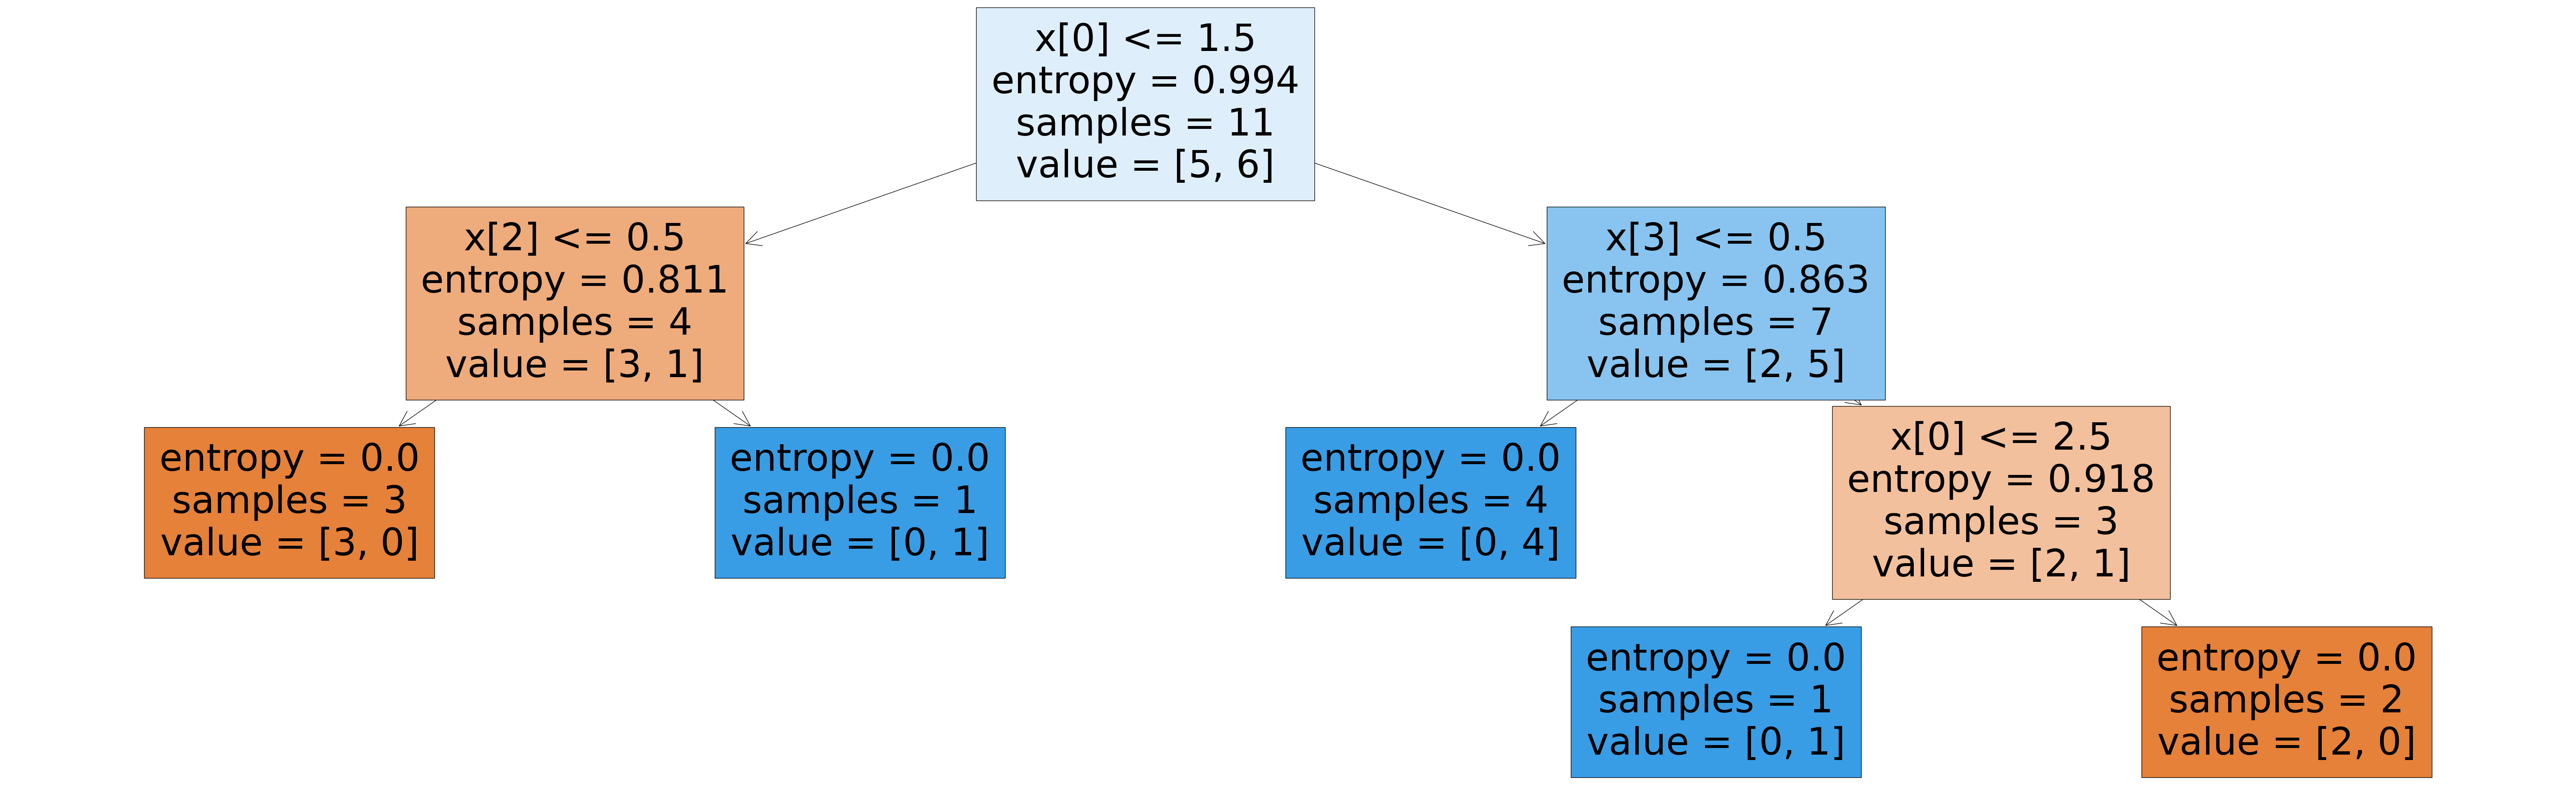

In [18]:
#desgining tree

from  sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,25))
plot_tree(model, filled=True)
plt.show()

In [19]:
# Load the data
data = pd.read_csv("D:\\COLLEGE\\3rd Year\\Machine Learning\\LAB\\D2-Processed-features.csv")
data['version'] = data['version'].map({'fake': 0, 'true': 1})
#dataset division training and testing
X = data.drop(['participant', 'believability'], axis=1)
y = data['believability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#running desicion tree classifier
ml_model = DecisionTreeClassifier(criterion='entropy')
model = ml_model.fit(X_train, y_train)
model.score(X_train, y_train)#Training Set accuracy
print(model.get_depth())#print the tree depth

21


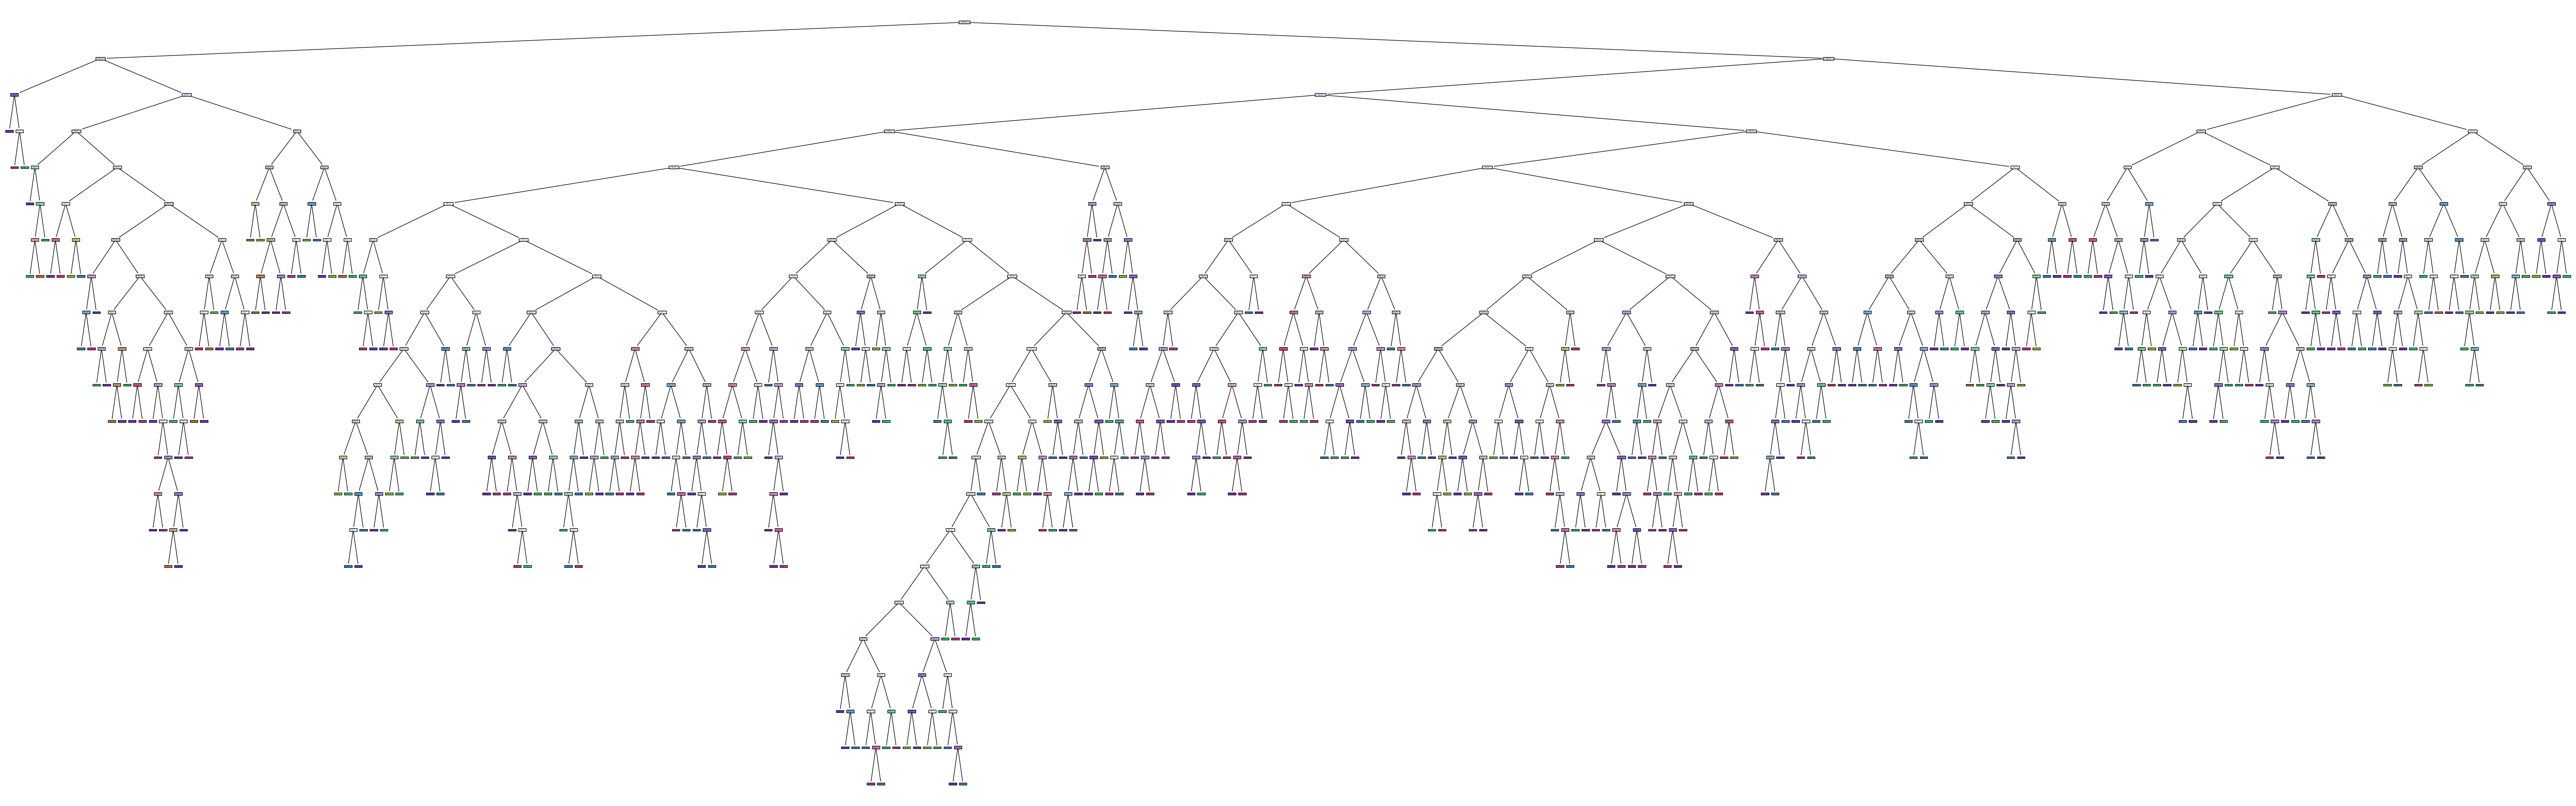

In [21]:
#printing tree
plt.figure(figsize=(80,25))
plot_tree(model, filled=True)
plt.show()


5


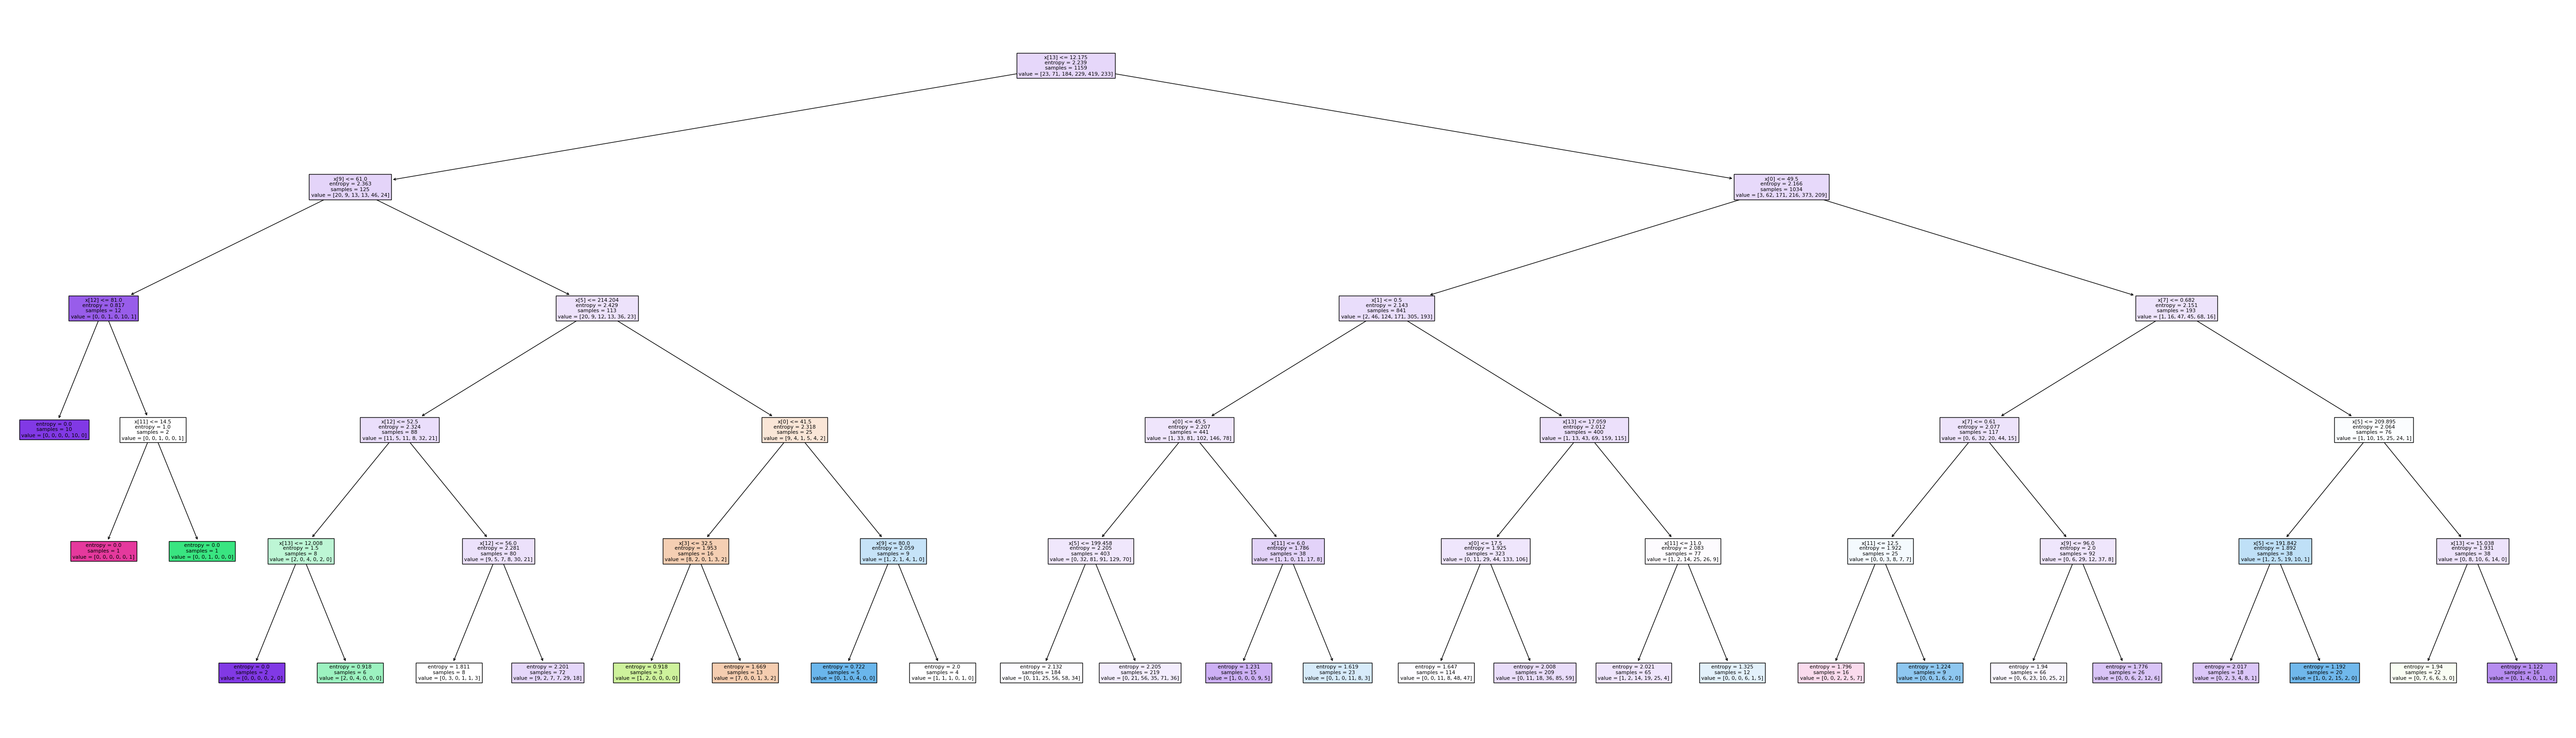

In [22]:
#running desicion tree classifier
ml_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
model = ml_model.fit(X_train, y_train)
model.score(X_train, y_train)#Training Set accuracy
print(model.get_depth())#print the tree depth
#printing tree
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()